In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [11]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
poker_hand = fetch_ucirepo(id=158) 
  
# data (as pandas dataframes) 
X = poker_hand.data.features 
y = poker_hand.data.targets 
  
# metadata 
print(poker_hand.metadata) 
  
# variable information 
print(poker_hand.variables) 


{'uci_id': 158, 'name': 'Poker Hand', 'repository_url': 'https://archive.ics.uci.edu/dataset/158/poker+hand', 'data_url': 'https://archive.ics.uci.edu/static/public/158/data.csv', 'abstract': 'Purpose is to predict poker hands', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1025010, 'num_features': 10, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['CLASS'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2002, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5KW38', 'creators': ['Robert Cattral', 'Franz Oppacher'], 'intro_paper': None, 'additional_info': {'summary': 'Each record is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. There is one Class attribute that describes the "Poker Hand". T

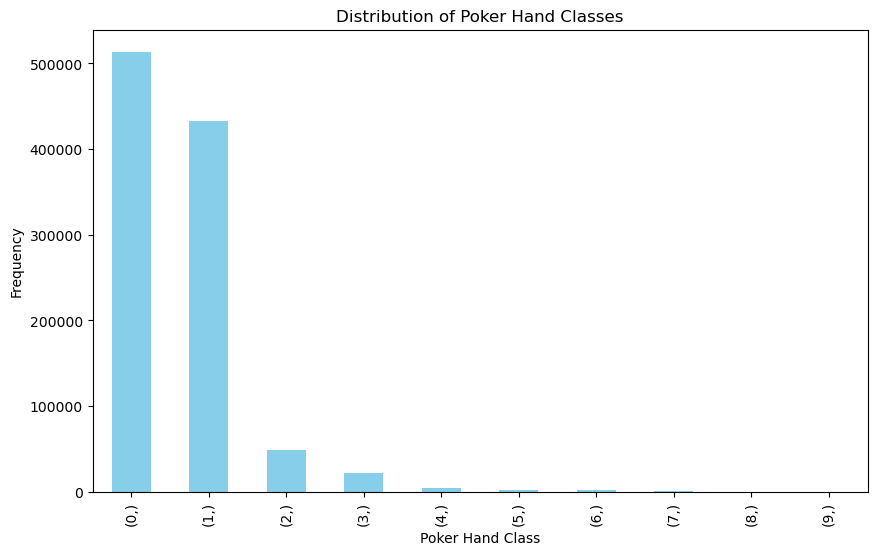

In [4]:
class_counts = y.value_counts()
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Poker Hand Classes')
plt.xlabel('Poker Hand Class')
plt.ylabel('Frequency')
plt.show()

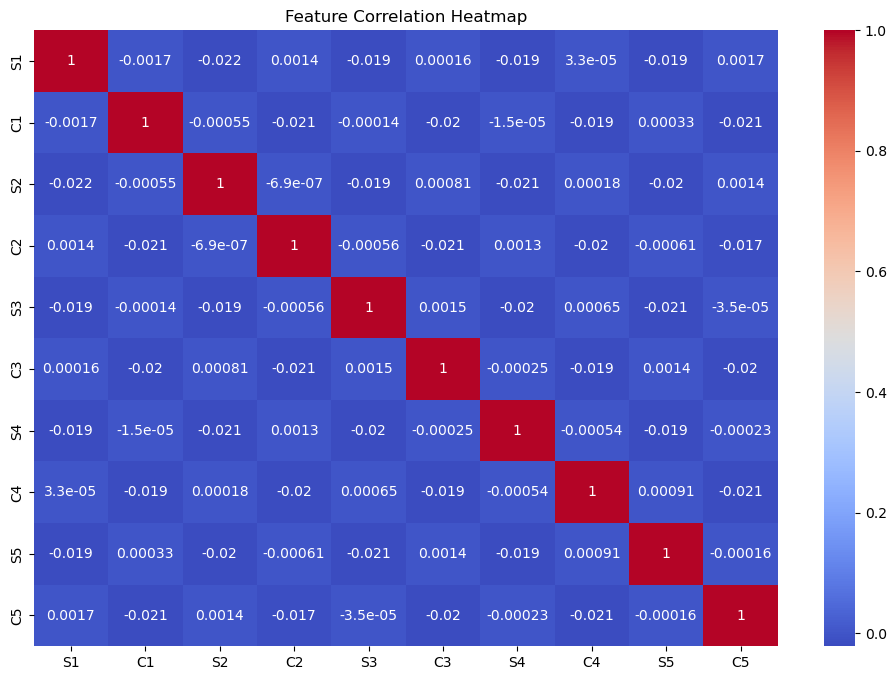

In [5]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [6]:
from ucimlrepo import fetch_ucirepo 
poker_hand = fetch_ucirepo(id=158) 

In [7]:
X = poker_hand.data.features
y = poker_hand.data.targets

print(f"Dataset Shape: {X.shape}")
print(f"Target Distribution:\n{y.value_counts()}")


Dataset Shape: (1025010, 10)
Target Distribution:
CLASS
0        513702
1        433097
2         48828
3         21634
4          3978
5          2050
6          1460
7           236
8            17
9             8
Name: count, dtype: int64


In [8]:
scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', scaler, X.columns),  # Scale all numeric features
    ]
)

X_preprocessed = preprocessor.fit_transform(X)

y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y_encoded, test_size=0.2, random_state=42
)

print("Preprocessing complete.")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Preprocessing complete.
Training set shape: (820008, 10)
Test set shape: (205002, 10)


Training KNN...
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.66      0.60      1023
           1       0.45      0.42      0.43       810
           2       0.00      0.00      0.00        93
           3       0.33      0.02      0.04        51
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         2

    accuracy                           0.51      2000
   macro avg       0.19      0.16      0.15      2000
weighted avg       0.47      0.51      0.48      2000



C:\Users\bmull\anaconda3\envs\itcs-3156\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bmull\anaconda3\envs\itcs-3156\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bmull\anaconda3\envs\itcs-3156\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

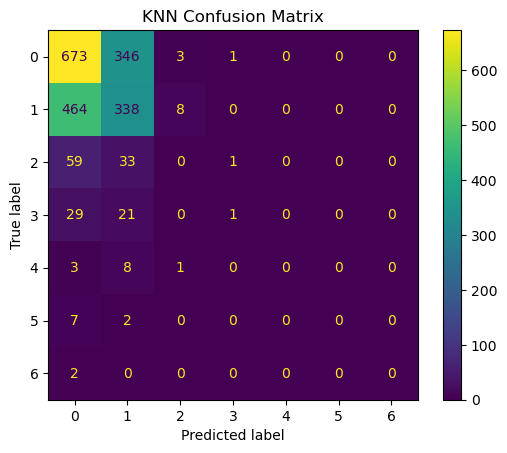

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.metrics import ConfusionMatrixDisplay

X_train_sampled = X_train[:10000]
y_train_sampled = y_train[:10000]
X_test_sampled = X_test[:2000]
y_test_sampled = y_test[:2000]


print("Training KNN...")
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  # Use multiple cores for efficiency
knn.fit(X_train_sampled, y_train_sampled.argmax(axis=1))  # Train using sampled data

y_pred_knn = knn.predict(X_test_sampled)
print("KNN Classification Report:")
print(classification_report(y_test_sampled.argmax(axis=1), y_pred_knn))

ConfusionMatrixDisplay.from_predictions(y_test_sampled.argmax(axis=1), y_pred_knn)
plt.title("KNN Confusion Matrix")
plt.show()

Training Linear Regression...
Linear Regression Results:
Mean Squared Error: 0.05727237841914834
R-squared: 0.1990574999151174
Classification Report for Linear Regression:
              precision    recall  f1-score   support

           0       0.51      0.99      0.67      1023
           1       0.38      0.01      0.02       810
           2       0.00      0.00      0.00        93
           3       0.00      0.00      0.00        51
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         2

    accuracy                           0.51      2000
   macro avg       0.13      0.14      0.10      2000
weighted avg       0.42      0.51      0.35      2000



C:\Users\bmull\anaconda3\envs\itcs-3156\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bmull\anaconda3\envs\itcs-3156\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bmull\anaconda3\envs\itcs-3156\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

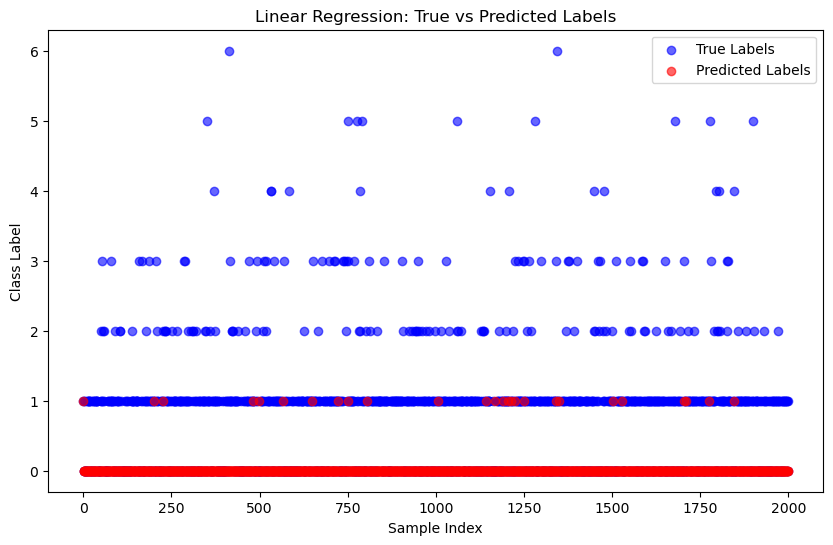

In [19]:
print("Training Linear Regression...")
lr = LinearRegression()
lr.fit(X_train_sampled, y_train_sampled)  # Linear Regression supports multi-output

y_pred_lr = lr.predict(X_test_sampled)

y_pred_lr_labels = np.argmax(y_pred_lr, axis=1)

mse = mean_squared_error(y_test_sampled, y_pred_lr)
r2 = r2_score(y_test_sampled, y_pred_lr)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("Classification Report for Linear Regression:")
print(classification_report(y_test_sampled.argmax(axis=1), y_pred_lr_labels))

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_sampled)), y_test_sampled.argmax(axis=1), color='blue', alpha=0.6, label='True Labels')
plt.scatter(range(len(y_pred_lr_labels)), y_pred_lr_labels, color='red', alpha=0.6, label='Predicted Labels')
plt.title("Linear Regression: True vs Predicted Labels")
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.legend()
plt.show()